In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [2]:
!pip install seaborn_qqplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from category_encoders import *
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV

import os
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, accuracy_score, make_scorer

# carregando dataset

In [5]:
df = pd.read_csv('Train_Test_Network.csv')
df = df.replace('-', None)
df.shape

(461043, 45)

In [6]:
df = df.dropna(axis=1)

X = df.drop(['label', 'type', 'src_ip', 'dst_ip', 'ts'], axis=1)#.values
y = df['type'].values

y = LabelEncoder().fit_transform(y)

In [7]:
X.head()

,src_port,dst_port,proto,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code
0,1883,52976,tcp,80549.530260,1762852,41933215,OTH,0,252181,14911156,2,236,0,0,0,0,0,0
1,47260,15600,udp,0.000000,0,0,S0,0,1,63,0,0,0,0,0,0,0,0
2,1880,51782,tcp,0.000000,0,0,OTH,0,0,0,0,0,0,0,0,0,0,0
3,34296,10502,tcp,0.000000,0,0,OTH,0,0,0,0,0,0,0,0,0,0,0
4,46608,53,udp,0.000549,0,298,SHR,0,0,0,2,354,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.80, random_state=42, stratify=y)

In [8]:
# determine categorical and numerical features
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns
enc = OrdinalEncoder()

def classification_report_with_accuracy_score(y_true, y_pred):
    print (classification_report(y_true, y_pred) )# print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score
ct = ColumnTransformer(
    [("text_preprocess", enc, categorical_ix),
     ('num_preprocess', MinMaxScaler(), numerical_ix)])

In [9]:
X[['proto', 'conn_state']] = enc.fit_transform(X[['proto', 'conn_state']])

In [10]:
X

,src_port,dst_port,proto,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code
0,1883,52976,1.0,80549.530260,1762852,41933215,0.0,0,252181,14911156,2,236,0,0,0,0,0,0
1,47260,15600,2.0,0.000000,0,0,6.0,0,1,63,0,0,0,0,0,0,0,0
2,1880,51782,1.0,0.000000,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0
3,34296,10502,1.0,0.000000,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0
4,46608,53,2.0,0.000549,0,298,12.0,0,0,0,2,354,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,33108,80,1.0,0.000000,0,0,6.0,0,1,60,0,0,0,0,0,0,0,0
461039,37242,443,1.0,0.000000,0,0,0.0,0,0,0,1,103,0,0,0,0,0,0
461040,4444,49178,1.0,290.371539,101568,2592,0.0,0,108,108064,31,3832,0,0,0,0,0,0
461041,60816,443,1.0,23.190902,32,31,10.0,0,8,411,7,395,0,0,0,0,0,0


In [ ]:
from scipy.stats import gamma
from seaborn_qqplot import pplot
pplot(X, x="src_port", kind='pp', y=gamma, height=5, aspect=3, display_kws={"identity":True})

In [15]:
from scipy import stats
rng = np.random.default_rng()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X.values)

z = scaler.transform(X.values)
for i, col in zip(range(z.shape[1]), X.columns):
    print(col)
    print(stats.kstest(z[:, i], 'norm'))

src_port
KstestResult(statistic=0.158265901252632, pvalue=0.0, statistic_location=-0.27236323626426556, statistic_sign=-1)
dst_port
KstestResult(statistic=0.2889387941212494, pvalue=0.0, statistic_location=-0.5564875717670938, statistic_sign=-1)
proto
KstestResult(statistic=0.3875443094370997, pvalue=0.0, statistic_location=-0.7158861076037981, statistic_sign=1)
duration
KstestResult(statistic=0.4926256438316549, pvalue=0.0, statistic_location=-0.01848582247137031, statistic_sign=-1)
src_bytes
KstestResult(statistic=0.502922856613222, pvalue=0.0, statistic_location=-0.009294793775776702, statistic_sign=1)
dst_bytes
KstestResult(statistic=0.5020691050111505, pvalue=0.0, statistic_location=-0.007410222481725561, statistic_sign=1)
conn_state
KstestResult(statistic=0.20225315033579505, pvalue=0.0, statistic_location=-1.0892834231243838, statistic_sign=1)
missed_bytes
KstestResult(statistic=0.5002407891340319, pvalue=0.0, statistic_location=-0.002783755072263075, statistic_sign=1)
src_pkts


In [13]:
len(z), z.shape

(461043, (461043, 18))

In [ ]:
# determine categorical and numerical features
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

def classification_report_with_accuracy_score(y_true, y_pred):
    print (classification_report(y_true, y_pred) )# print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

enc = OrdinalEncoder()

ct = ColumnTransformer(
    [("text_preprocess", enc, categorical_ix),
     ('num_preprocess', MinMaxScaler(), numerical_ix)])

ct.fit(X_train, y_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='log_loss',
                                               min_samples_split=2,
                                               splitter='best')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss')

In [ ]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16000
           1       1.00      1.00      1.00     16000
           2       1.00      1.00      1.00     16000
           3       1.00      1.00      1.00     16000
           4       1.00      1.00      1.00       834
           5       1.00      1.00      1.00    240000
           6       1.00      1.00      1.00     16000
           7       1.00      1.00      1.00     16000
           8       1.00      1.00      1.00     16000
           9       1.00      1.00      1.00     16000

    accuracy                           1.00    368834
   macro avg       1.00      1.00      1.00    368834
weighted avg       1.00      1.00      1.00    368834



In [ ]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    240000
           1       1.00      1.00      1.00    240000
           2       1.00      1.00      1.00    240000
           3       1.00      1.00      1.00    240000
           4       1.00      1.00      1.00    240000
           5       1.00      1.00      1.00    240000
           6       1.00      1.00      1.00    240000
           7       1.00      1.00      1.00    240000
           8       1.00      1.00      1.00    240000
           9       1.00      1.00      1.00    240000

    accuracy                           1.00   2400000
   macro avg       1.00      1.00      1.00   2400000
weighted avg       1.00      1.00      1.00   2400000



In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.94      0.96      0.95      4000
           2       0.96      0.97      0.97      4000
           3       0.94      0.95      0.95      4000
           4       0.59      0.66      0.62       209
           5       1.00      0.99      1.00     60000
           6       0.98      0.98      0.98      4000
           7       1.00      1.00      1.00      4000
           8       0.98      0.99      0.98      4000
           9       0.95      0.95      0.95      4000

    accuracy                           0.99     92209
   macro avg       0.93      0.95      0.94     92209
weighted avg       0.99      0.99      0.99     92209



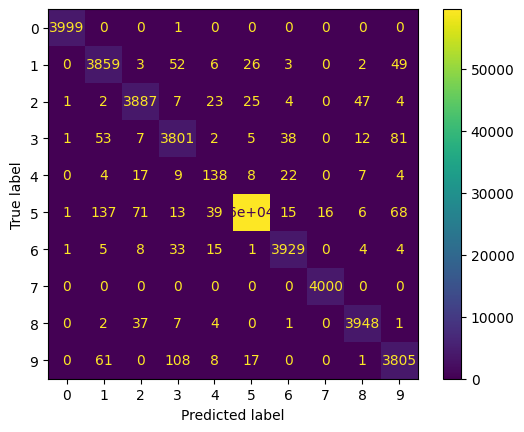

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=clf.classes_)

disp.plot()

## gridsearch

In [ ]:
parameter_space = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'],
    'dt__splitter': ['best', 'random'],
    'dt__min_samples_split': [2, 4, 8],
}

enc = OrdinalEncoder()

ct = ColumnTransformer(
    [("text_preprocess", enc, categorical_ix),
     ('num_preprocess', MinMaxScaler(), numerical_ix)])

pipe = Pipeline(steps=[("scaler", ct), ("dt", tree.DecisionTreeClassifier())])
search = GridSearchCV(pipe, parameter_space, n_jobs=1, cv=2)
search.fit(X, y)

In [ ]:
search.best_params_

In [ ]:
enc = OrdinalEncoder()
# enc = JamesSteinEncoder(cols=categorical_ix)
# enc = OneHotEncoder()

ct = ColumnTransformer(
    [("text_preprocess", enc, categorical_ix),
     ('num_preprocess', MinMaxScaler(), numerical_ix)])

clf = make_pipeline(ct,
                    RandomForestClassifier(criterion= 'log_loss', 
                       max_depth= 8, 
                       max_features= 'log2', 
                       min_samples_split= 4, 
                       n_estimators= 300))

scores = cross_val_score(
    clf, 
    X, 
    y, 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
    scoring=make_scorer(classification_report_with_accuracy_score), verbose=1)
scores

In [ ]:
enc = OrdinalEncoder()
# enc = JamesSteinEncoder(cols=categorical_ix)
# enc = OneHotEncoder()

ct = ColumnTransformer(
    [("text_preprocess", enc, categorical_ix),
     ('num_preprocess', MinMaxScaler(), numerical_ix)])

clf = make_pipeline(ct,
                    tree.DecisionTreeClassifier(criterion='log_loss',
                                               min_samples_split=2,
                                               splitter='best'))

scores = cross_val_score(
    clf, 
    X, 
    y, 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
    scoring=make_scorer(classification_report_with_accuracy_score), verbose=1)
scores

In [ ]:
parameter_space = {
    'mlp__hidden_layer_sizes': [(100,100),(200,)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.01, 0.001],
    'mlp__learning_rate': ['constant','adaptive'],
    'mlp__verbose': [True],
    'mlp__max_iter': [100]
}

enc = OrdinalEncoder()

ct = ColumnTransformer(
    [("text_preprocess", enc, categorical_ix),
     ('num_preprocess', MinMaxScaler(), numerical_ix)])

pipe = Pipeline(steps=[("scaler", ct), ("mlp", MLPClassifier())])
search = GridSearchCV(pipe, parameter_space, n_jobs=1, cv=2)
search.fit(X, y)

In [ ]:
search.best_params_

In [ ]:
search.best_score_

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant','adaptive'],
    'verbose': [True]
}

enc = OrdinalEncoder()
# enc = JamesSteinEncoder(cols=categorical_ix)
# enc = OneHotEncoder()

ct = ColumnTransformer(
    [("text_preprocess", enc, categorical_ix),
     ('num_preprocess', MinMaxScaler(), numerical_ix)])

clf = GridSearchCV(MLPClassifier(), parameter_space, n_jobs=-1, cv=5)

pipe = make_pipeline(ct,
                    clf)

pipe.fit(X, y)
pipe.predict()

## cross validation

In [ ]:
enc = OrdinalEncoder()
# enc = JamesSteinEncoder(cols=categorical_ix)
# enc = OneHotEncoder()

ct = ColumnTransformer(
    [("text_preprocess", enc, categorical_ix),
     ('num_preprocess', MinMaxScaler(), numerical_ix)])

clf = make_pipeline(ct,
                    MLPClassifier(activation='tanh',
                                  alpha=0.001,
                                  hidden_layer_sizes=(100, 100),
                                  learning_rate='adaptive',
                                  max_iter=200,
                                  solver='adam',
                                  verbose=True))

scores = cross_val_score(
    clf, 
    X, 
    y, 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
    scoring=make_scorer(classification_report_with_accuracy_score), verbose=1)
scores

In [ ]:
# labels = ['backdoor',
#           'ddos',
#           'dos', 
#           'injection',
#           'mitm',
#           'normal',
#           'password',
#           'ransomware',
#           'scanning',
#           'xss']

In [ ]:
# from sklearn.model_selection import StratifiedKFold, KFold
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# classifier = 'MLP'
# results = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}


# for idx, (train_index, test_index) in enumerate(skf.split(X, y)):
#     print(f'{idx}° execução')
    
#     # dividindo treino e teste
#     X_train = X[train_index]
#     X_test = X[test_index]
#     y_train = y[train_index]
#     y_test = y[test_index]

#     # normalizando os dados
#     scale = MinMaxScaler()#StandardScaler()
#     scale.fit(X_train)
#     X_train = scale.transform(X_train)
#     X_test = scale.transform(X_test)

#     # escolhendo um classificador e treinando
#     if classifier == 'neigh':
#         clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
#     elif classifier == 'RF':
#         clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
#     elif classifier == 'GBM':
#         clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
#     elif classifier == 'MLP':
#         clf = MLPClassifier(max_iter=300).fit(X_train, y_train)
#     elif classifier == 'NB':
#         clf = GaussianNB().fit(X_train, y_train)
#     elif classifier == 'SVM':
#         clf = SVC(gamma='auto').fit(X_train, y_train)
#     elif classifier == 'LR':
#         clf = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear').fit(X_train, y_train)
#     elif classifier == 'CART':
#         clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
    
#     # prevendo labels das amostras e calculando métricas
#     predictions = clf.predict(X_test)
#     report = classification_report(y_test, predictions, zero_division=0, output_dict=True)
# #     print(report)
    
#     # plotando matriz de confusão
#     cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                                   display_labels=clf.classes_)
#     disp.plot()
#     plt.show()

#     # calculando média e desvio padrão da métrica f1-score
#     for idx in range(10):
#         results[idx].append(report[str(idx)]['f1-score'])

# print('médias f1 score 5 execuções\n')
# for idx in range(10):
#     print(f'{labels[idx]}: {round(np.mean(results[idx]), 4)} +- {round(np.std(results[idx]), 4)}')